# **Optimization Techniques in Machine Learning**

In [ ]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# **The Dataset**
## Problem Statement  
Glaucoma is a leading cause of blindness, and early detection is crucial for prevention. This project aims to develop a Convolutional Neural Network (CNN) model to classify glaucoma from retinal images.  

## Solution  
A deep learning-based CNN model is trained on a dataset of retinal images to detect glaucoma, optimizing hyperparameters for improved accuracy.  

## Dataset  
- **Link:** https://www.kaggle.com/datasets/sabari50312/fundus-pytorch  
- **Description:** The dataset consists of labeled retinal fundus images, categorized into "Glaucoma" and "Healthy" classes, with images later resized to (128, 128, 3).
- **More About Dataset** Contains Train, Val and Test set of Fundus images for Glaucoma Detection.
-  The dataset has 2 Classes (0|1) where 1 means **Glaucoma Present** and 0 means **Glaucoma not Present**


In [ ]:
import kagglehub


path = kagglehub.dataset_download("sabari50312/fundus-pytorch")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fundus-pytorch


In [ ]:
import os

# Define paths to the train, validation, and test directories
train_dir = "/kaggle/input/fundus-pytorch/train"
test_dir = "/kaggle/input/fundus-pytorch/test"
val_dir = "/kaggle/input/fundus-pytorch/val"

# List the contents of the directories
print("Training folder contents:", os.listdir(train_dir))
print("Test folder contents:", os.listdir(test_dir))
print("Validation folder contents:", os.listdir(val_dir))


Training folder contents: ['0', '1']
Test folder contents: ['0', '1']
Validation folder contents: ['0', '1']


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Function to load images and labels from the folder
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, label)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = image.load_img(img_path, target_size=(128,128))
                img_array = image.img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(int(label))  # 0 for class '0', 1 for class '1'
    return np.array(images), np.array(labels)

# Load images and labels for each dataset
X_train, y_train = load_images_from_folder(train_dir)
X_valid, y_valid = load_images_from_folder(val_dir)
X_test, y_test = load_images_from_folder(test_dir)

# Check the shapes of the data
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_valid.shape}, Labels shape: {y_valid.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (8621, 128, 128, 3), Labels shape: (8621,)
Validation data shape: (5747, 128, 128, 3), Labels shape: (5747,)
Test data shape: (2874, 128, 128, 3), Labels shape: (2874,)


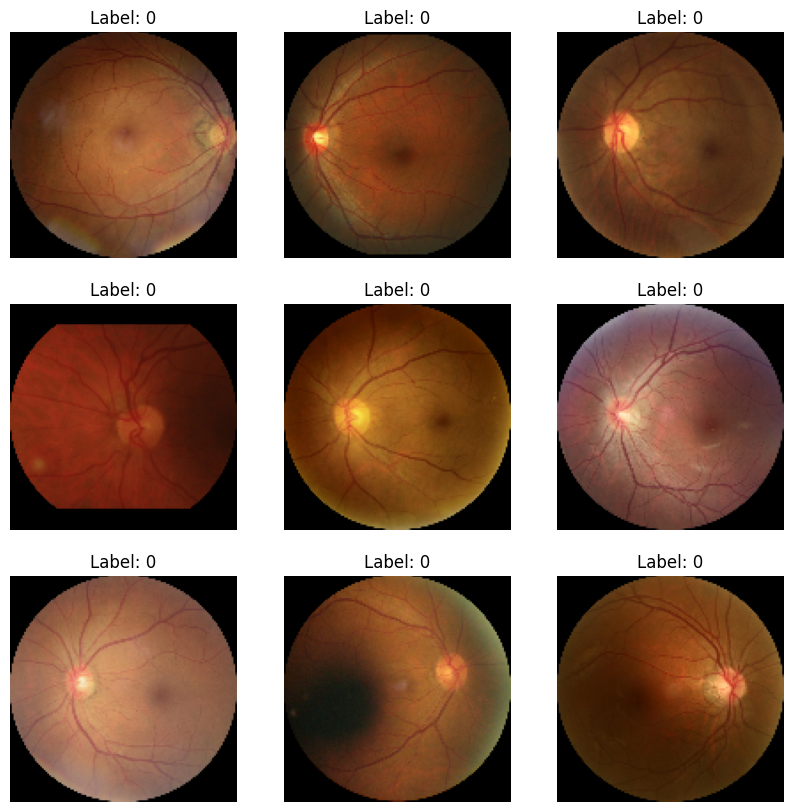

In [ ]:
import matplotlib.pyplot as plt

# Visualizing a few images from the training dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [ ]:
print(f"Original Training labels shape: {y_train.shape}")
print(f"Original Validation labels shape: {y_valid.shape}")
print(f"Original Test labels shape: {y_test.shape}")

# Check unique labels to ensure that they are binary (0 and 1)
print(f"Unique labels in y_train: {np.unique(y_train)}")
print(f"Unique labels in y_valid: {np.unique(y_valid)}")
print(f"Unique labels in y_test: {np.unique(y_test)}")


Original Training labels shape: (8621,)
Original Validation labels shape: (5747,)
Original Test labels shape: (2874,)
Unique labels in y_train: [0 1]
Unique labels in y_valid: [0 1]
Unique labels in y_test: [0 1]


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical  # Import one-hot encoding function
import numpy as np
import os

# Function to load images and labels from the folder
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, label)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = image.load_img(img_path, target_size=(128,128))
                img_array = image.img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(int(label))  # 0 for class '0', 1 for class '1'
    return np.array(images), np.array(labels)

# Load images and labels for each dataset
X_train, y_train = load_images_from_folder(train_dir)
X_valid, y_valid = load_images_from_folder(val_dir)
X_test, y_test = load_images_from_folder(test_dir)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_valid = to_categorical(y_valid, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Check the shapes of the data
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_valid.shape}, Labels shape: {y_valid.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (8621, 128, 128, 3), Labels shape: (8621, 2)
Validation data shape: (5747, 128, 128, 3), Labels shape: (5747, 2)
Test data shape: (2874, 128, 128, 3), Labels shape: (2874, 2)


# SECTION 1: Model Architecture:

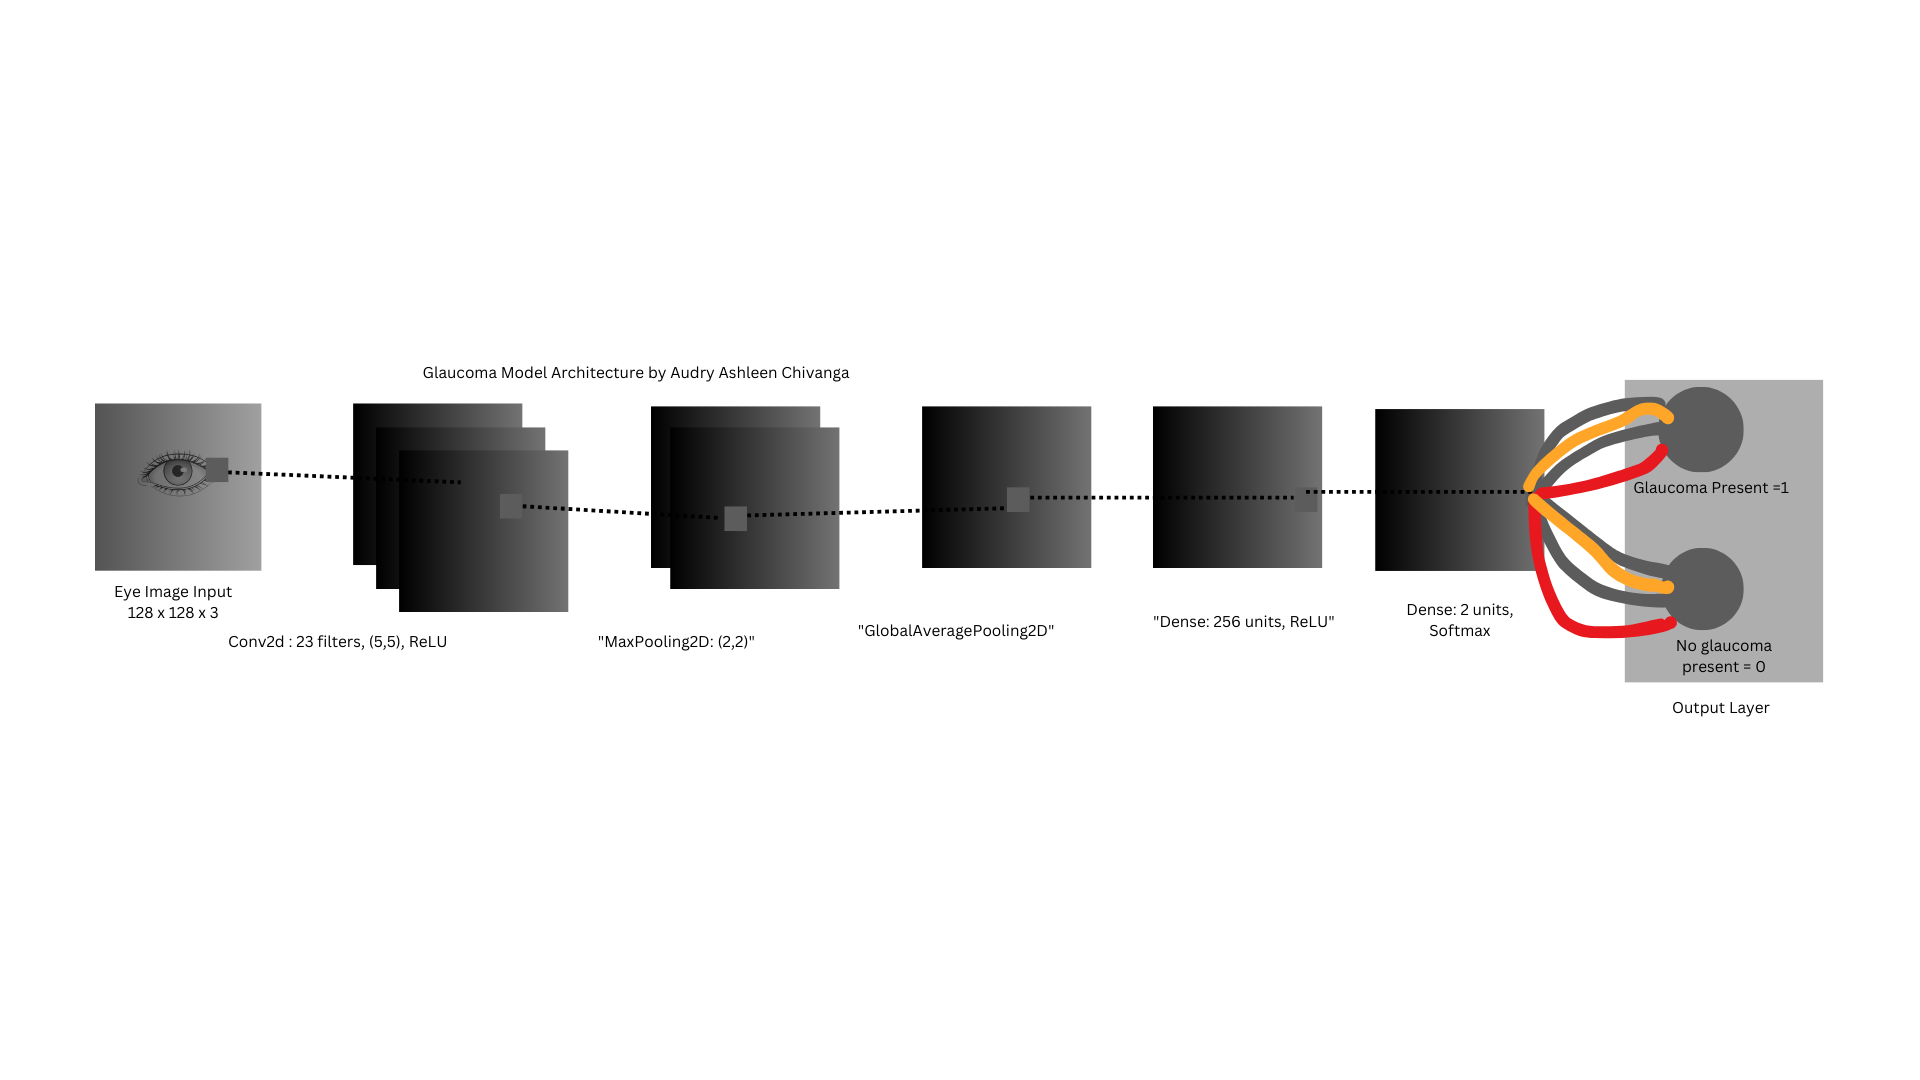

 **Defining a function that creates models without and With specified Optimization techniques**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

def define_model(optimizer_name="adam", regularization_type=None, early_stopping=False, dropout=0.0, learning_rate=0.001):
    """
    Defines a CNN model for glaucoma detection with configurable hyperparameters.

    Parameters:
    - optimizer_name (str): Choose optimizer ("adam", "rmsprop")
    - regularization_type (str or None): Choose regularization ("l1", "l2", or None)
    - early_stopping (bool): Whether to enable early stopping
    - dropout (float): Dropout rate (0.0 to 1.0)
    - learning_rate (float): Learning rate for optimizer

    Returns:
    - model (Sequential): Compiled Keras model
    """

    # Defining Regularizer if applicable
    regularizer = None
    if regularization_type == "l1":
        regularizer = l1(0.01)
    elif regularization_type == "l2":
        regularizer = l2(0.01)

    # Model Architecture
    model = Sequential([
        Conv2D(32, (5,5), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(2,2),

        Conv2D(64, (5,5), activation='relu', kernel_regularizer=regularizer),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizer),
        MaxPooling2D(2,2),

        # Global Average Pooling instead of Flatten
        GlobalAveragePooling2D(),

        Dense(256, activation='relu', kernel_regularizer=regularizer)
    ])

    # Applying dropout if specified
    if dropout > 0:
        model.add(Dropout(dropout))

    # Output Layer
    model.add(Dense(2, activation='softmax'))  # Output for Binary Classification (Glaucoma vs. No Glaucoma)

    # Select Optimizer
    if optimizer_name == "adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer. Choose 'adam' or 'rmsprop'.")

    # Compiling Model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Early Stopping Callback
    callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)] if early_stopping else None

    return model, callbacks


In [ ]:
def train_model(model, X_train, y_train, X_valid, y_valid, epochs=10, batch_size=32, callbacks=None, model_name=None):
    """
    Train the CNN model and optionally save it.

    Parameters:
    - model (Sequential): The compiled model
    - X_train, y_train: Training data and labels
    - X_valid, y_valid: Validation data and labels
    - epochs (int): Number of training epochs
    - batch_size (int): Batch size
    - callbacks (list): List of callback functions
    - model_name (str): Name to save the model as (optional)

    Returns:
    - history: Training history object
    """
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks
    )

    if model_name:
        # Save the model if model_name is provided
        saved_models_dir = "saved_models"
        os.makedirs(saved_models_dir, exist_ok=True)
        model.save(os.path.join(saved_models_dir, f"{model_name}.h5"))
        print(f"✅ Model '{model_name}' has been saved successfully!")

    return history


In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the trained CNN model on the test dataset.

    Parameters:
    - model (Sequential): Trained Keras model
    - X_test, y_test: Test dataset and labels

    Returns:
    - test_loss, test_acc: Model performance on test set
    """
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    return test_loss, test_acc


In [ ]:
import matplotlib.pyplot as plt

def loss_curve_plot(models_histories):
    """
    Plots the training and validation loss for multiple models side by side.

    Args:
        models_histories (dict): A dictionary where keys are model names
                                 and values are their history objects.
    """
    num_models = len(models_histories)
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))


    if num_models == 1:
        axes = [axes]

    for ax, (model_name, history) in zip(axes, models_histories.items()):
        epochs = range(1, len(history.history['loss']) + 1)

        ax.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
        ax.plot(epochs, history.history['val_loss'], 'r*-', label='Validation Loss')
        ax.set_title(f'{model_name} Loss Curve')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def print_model_metrics(models, X_test, y_test):
    print(f"{'Model':<20}{'Accuracy':<10}{'Loss':<10}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'ROC-AUC':<10}")
    print("-" * 80)

    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")

        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)

        if len(y_test.shape) > 1 and y_test.shape[1] > 1:
            accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
            precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted', zero_division=0)
            recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted', zero_division=0)
            f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted', zero_division=0)
            roc_auc = None
        else:
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            if len(np.unique(y_test)) == 2:
                roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
            else:
                roc_auc = None

        loss = model.evaluate(X_test, y_test, verbose=0)[0]

        print(f"{model_name:<20}{accuracy:<10.4f}{loss:<10.4f}{precision:<10.4f}{recall:<10.4f}{f1:<10.4f}{roc_auc if roc_auc is not None else 'N/A':<10}")


**Instance 1 : Base Model (No Optimizations)**

In [ ]:
model_base, callbacks_base = define_model()
history_base = train_model(model_base, X_train, y_train, X_valid, y_valid, epochs=10, model_name="model_base")
evaluate_model(model_base, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.6455 - loss: 0.6345 - val_accuracy: 0.7070 - val_loss: 0.5946
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6924 - loss: 0.6038 - val_accuracy: 0.6918 - val_loss: 0.6227
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7105 - loss: 0.5812 - val_accuracy: 0.7331 - val_loss: 0.5557
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7256 - loss: 0.5612 - val_accuracy: 0.7414 - val_loss: 0.5465
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7440 - loss: 0.5440 - val_accuracy: 0.7534 - val_loss: 0.5272
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7533 - loss: 0.5296 - val_accuracy: 0.7600 - val_loss: 0.5126
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7520 - loss: 0.5201 - val_accuracy: 0.7641 - val_loss: 0.5082
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7660 - loss: 0.4956 - val_acc

(0.45780596137046814, 0.7887961268424988)

**Training Instance 2 :  Model with Adam Optimizer & L1 Regularization**

In [ ]:
model_l1, callbacks_l1 = define_model(optimizer_name="adam", regularization_type="l1")
history_l1 = train_model(model_l1, X_train, y_train, X_valid, y_valid, epochs=10)
evaluate_model(model_l1, X_test, y_test)


Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.6012 - loss: 17.5493 - val_accuracy: 0.6158 - val_loss: 0.8617
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6175 - loss: 0.8601 - val_accuracy: 0.6158 - val_loss: 0.8613
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6115 - loss: 0.8628 - val_accuracy: 0.6158 - val_loss: 0.8614
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6254 - loss: 0.8565 - val_accuracy: 0.6158 - val_loss: 0.8606
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6132 - loss: 0.8621 - val_accuracy: 0.6158 - val_loss: 0.8616
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6140 - loss: 0.8620 - val_accuracy: 0.6158 - val_loss: 0.8600
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6201 - loss: 0.8588 - val_accuracy: 0.6158 - val_loss: 0.8621
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6075 - loss: 0.8642 - val_ac

(0.8635917901992798, 0.6102992296218872)

**Training Instance 2 : Model with Adam Optimizer & L2 Regularization**

In [ ]:
model_l2, callbacks_l2 = define_model(optimizer_name="adam", regularization_type="l2")
history_l2 = train_model(model_l2, X_train, y_train, X_valid, y_valid, epochs=10)
evaluate_model(model_l2, X_test, y_test)


Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.6106 - loss: 1.5912 - val_accuracy: 0.6590 - val_loss: 0.6475
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6691 - loss: 0.6383 - val_accuracy: 0.6741 - val_loss: 0.6298
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6466 - loss: 0.6404 - val_accuracy: 0.6503 - val_loss: 0.6390
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6574 - loss: 0.6354 - val_accuracy: 0.6727 - val_loss: 0.6271
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6659 - loss: 0.6323 - val_accuracy: 0.6725 - val_loss: 0.6251
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6624 - loss: 0.6348 - val_accuracy: 0.6694 - val_loss: 0.6258
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6745 - loss: 0.6238 - val_accuracy: 0.6551 - val_loss: 0.6350
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6699 - loss: 0.6277 - val_acc

(0.6230320930480957, 0.6684064269065857)

**Training Instance 3 : Fully Optimized Model (Adam + L2 + Dropout + Early Stopping)**

In [ ]:
model_full, callbacks_full = define_model(optimizer_name="adam", regularization_type="l2", early_stopping=True, dropout=0.3, learning_rate=0.0005)
history_full = train_model(model_full, X_train, y_train, X_valid, y_valid, epochs=10)
evaluate_model(model_full, X_test, y_test)


Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.6148 - loss: 2.0458 - val_accuracy: 0.6503 - val_loss: 0.7087
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6582 - loss: 0.6825 - val_accuracy: 0.6623 - val_loss: 0.6431
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6656 - loss: 0.6445 - val_accuracy: 0.6739 - val_loss: 0.6378
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6723 - loss: 0.6322 - val_accuracy: 0.6637 - val_loss: 0.6297
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6790 - loss: 0.6269 - val_accuracy: 0.6687 - val_loss: 0.6311
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6624 - loss: 0.6385 - val_accuracy: 0.6739 - val_loss: 0.6304
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6703 - loss: 0.6285 - val_accuracy: 0.6600 - val_loss: 0.6298
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6690 - loss: 0.6317 - val_acc

(0.6191810965538025, 0.6767571568489075)

> Now that we have trained the CNN models first, l am going to print the loss curves for all of them OK

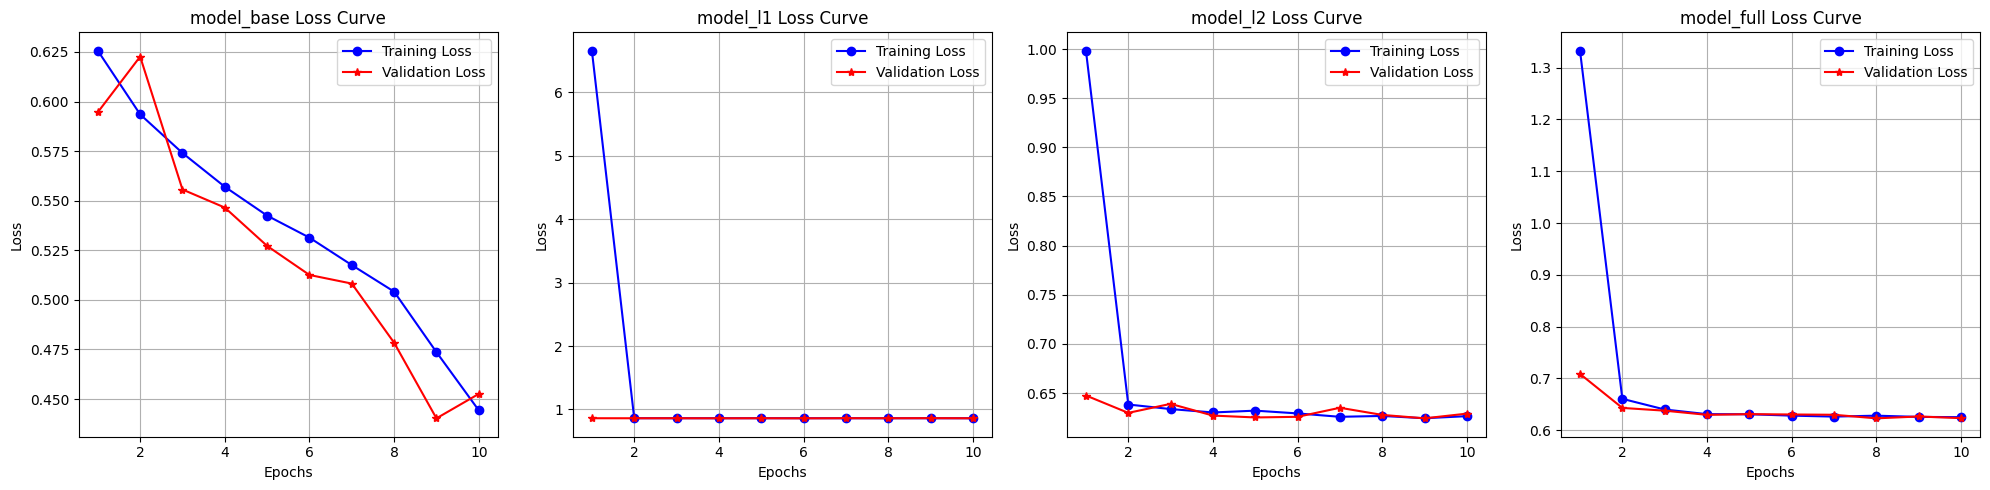

In [ ]:
models_histories = {
    "model_base": history_base,
    "model_l1": history_l1,
    "model_l2": history_l2,
    "model_full": history_full
}

loss_curve_plot(models_histories)


In [ ]:

models = {
    "CNN_Model_1": model_base,
    "CNN_Model_2": model_l1,
    "CNN_Model_3": model_l2,
    "CNN_Model_Full": model_full
}


print_model_metrics(models, X_test, y_test)

Model               Accuracy  Loss      Precision Recall    F1-Score  ROC-AUC   
--------------------------------------------------------------------------------
Evaluating CNN_Model_1...
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
CNN_Model_1         0.7888    0.4578    0.7878    0.7888    0.7882    N/A       
Evaluating CNN_Model_2...
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
CNN_Model_2         0.6103    0.8636    0.3725    0.6103    0.4626    N/A       
Evaluating CNN_Model_3...
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
CNN_Model_3         0.6684    0.6230    0.6592    0.6684    0.6467    N/A       
Evaluating CNN_Model_Full...
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
CNN_Model_Full      0.6768    0.6192    0.6703    0.6768    0.6532    N/A       


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss, roc_auc_score
import numpy as np

# Reshaping image data: Flatten (128,128,3) to (128*128*3) for logistic regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Converting one-hot labels back to single integers
y_train_flat = np.argmax(y_train, axis=1)
y_valid_flat = np.argmax(y_valid, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

# Initializing and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train_flat, y_train_flat)

# Predictions
y_pred = logreg.predict(X_test_flat)
y_pred_proba = logreg.predict_proba(X_test_flat)[:, 1]  # Probabilities for ROC-AUC

# Evaluation Metrics
accuracy = accuracy_score(y_test_flat, y_pred)
loss = log_loss(y_test_flat, y_pred_proba)
report = classification_report(y_test_flat, y_pred, output_dict=True)

precision = report['1']['precision']
recall = report['1']['recall']
f1_score = report['1']['f1-score']
roc_auc = roc_auc_score(y_test_flat, y_pred_proba)

# Print Results
print(f"📌 Accuracy: {accuracy:.4f}")
print(f"📌 Loss: {loss:.4f}")
print(f"📌 Precision: {precision:.4f}")
print(f"📌 Recall: {recall:.4f}")
print(f"📌 F1-score: {f1_score:.4f}")
print(f"📌 ROC-AUC Score: {roc_auc:.4f} (Bonus) ")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📌 Accuracy: 0.9882
📌 Loss: 0.0995
📌 Precision: 0.9927
📌 Recall: 0.9768
📌 F1-score: 0.9847
📌 ROC-AUC Score: 0.9995 (Bonus) 


In [ ]:
import joblib

# Saving the trained logistic regression model to a file
joblib.dump(logreg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

> The LogisticRegression model shows really good results and it was the best model. Although this might look unreal, l will still take it as the best model because the dataset was for health, so from my analysis, its possible to get this results.

**Finally, Making predictions using the best model.I had already saved the model so that l can call and load it later**

In [ ]:
import os
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# Define paths to the train, validation, and test directories
train_dir = "/kaggle/input/fundus-pytorch/train"
test_dir = "/kaggle/input/fundus-pytorch/test"
val_dir = "/kaggle/input/fundus-pytorch/val"

# Example: Load the test images from the directory
def load_images_from_dir(directory, target_size=(128, 128)):
    images = []
    labels = []

    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for image_name in os.listdir(label_dir):
                if image_name.endswith('.jpg') or image_name.endswith('.png'):
                    img_path = os.path.join(label_dir, image_name)
                    img = Image.open(img_path)
                    img = img.resize(target_size)
                    img = np.array(img)
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels)

# Loading test images and labels from the test directory
X_test, y_test = load_images_from_dir(test_dir)

# Reshaping the test images to match the input format for Logistic Regression (flattened)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Encoding the labels to integers (assuming the labels are strings)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Loading the saved Logistic Regression model
logreg = joblib.load('logistic_regression_model.pkl')

# Making predictions using the loaded model
y_pred = logreg.predict(X_test_flat)
y_pred_proba = logreg.predict_proba(X_test_flat)[:, 1]  # Probabilities for ROC-AUC

# Evaluation Metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

# Results
print(f" Accuracy: {accuracy:.4f}")
print(f" Classification Report:\n{report}")


 Accuracy: 0.8869
 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1754
           1       0.96      0.74      0.84      1120

    accuracy                           0.89      2874
   macro avg       0.91      0.86      0.87      2874
weighted avg       0.90      0.89      0.88      2874



In [ ]:
import shutil

# Saving each model
models = {
    "CNN_Model_1": model_base,
    "CNN_Model_1": model_l1,
    "CNN_Model_2": model_l2,
    "CNN_Model_Full": model_full
}

# Saving each model in .h5 format
for model_name, model in models.items():
    model.save(f'{model_name}.h5')
    print(f'Model saved: {model_name}.h5')

# Moving the saved models to the /kaggle/working directory for download
for model_name in models.keys():
    shutil.move(f'{model_name}.h5', f'/kaggle/working/{model_name}.h5')
    print(f'Model moved to /kaggle/working/{model_name}.h5')

# Now, all my models are saved and ready for download in the /kaggle/working/ directory
print("All models are saved and ready for download!")


Model saved: CNN_Model_1.h5
Model saved: CNN_Model_2.h5
Model saved: CNN_Model_Full.h5
Model moved to /kaggle/working/CNN_Model_1.h5
Model moved to /kaggle/working/CNN_Model_2.h5
Model moved to /kaggle/working/CNN_Model_Full.h5
All models are saved and ready for download!


In [ ]:
shutil.move('logistic_regression_model.pkl', '/kaggle/working/logistic_regression_model.pkl')

'/kaggle/working/logistic_regression_model.pkl'